<a href="https://colab.research.google.com/github/Haditamaaa/image_classification/blob/main/KNN4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ***Collection Data***

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# ***Preprocessing Dataset***

## ***Grayscale Dataset***

In [ ]:
input_path = "/content/drive/MyDrive/ASKRIPSI/BERAS"
output_path = "/content/drive/MyDrive/ASKRIPSI/BGRAY"

In [ ]:
import os
import cv2

for subfolder in os.listdir(input_path):
  input_subfolder_path = os.path.join(input_path, subfolder)
  output_subfolder_path = os.path.join(output_path, subfolder)

  os.makedirs(output_subfolder_path, exist_ok=True)

  for filename in os.listdir(input_subfolder_path):
     input_image_path = os.path.join(input_subfolder_path, filename)
     output_image_path = os.path.join(output_subfolder_path, filename)

     img = cv2.imread(input_image_path)

     gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

     _, threshold_img = cv2.threshold(gray_img, 0 , 255,
                                  cv2.THRESH_BINARY +
                                  cv2.THRESH_OTSU)

     cv2.imwrite(output_image_path, threshold_img)

## ***Resize Dataset***

In [ ]:
input_path1 = "/content/drive/MyDrive/ASKRIPSI/BGRAY"
output_path1 = "/content/drive/MyDrive/ASKRIPSI/BREZE"

In [ ]:
for subfolder in os.listdir(input_path1):
  input_subfolder_path = os.path.join(input_path1, subfolder)
  output_subfolder_path = os.path.join(output_path1, subfolder)

  os.makedirs(output_subfolder_path, exist_ok=True)

  for filename in os.listdir(input_subfolder_path):
     input_image_path = os.path.join(input_subfolder_path, filename)
     output_image_path = os.path.join(output_subfolder_path, filename)

     img = cv2.imread(input_image_path)

     resize_img = cv2.resize(img, (150, 150))

     cv2.imwrite(output_image_path, resize_img)

## ***Remove Background Dataset***

In [ ]:
import shutil
from PIL import Image, ImageFilter

def remove_white_noise(input_path2, output_path2, radius=5):
    os.makedirs(output_path2, exist_ok=True)

    # Iterate over the subfolders in the dataset directory
    for subfolder_name in os.listdir(input_path2):
        subfolder_path = os.path.join(input_path2, subfolder_name)
        if not os.path.isdir(subfolder_path):
            continue  # Skip non-directory files

        output_subfolder_path = os.path.join(output_path2, subfolder_name)
        os.makedirs(output_subfolder_path, exist_ok=True)

        # Iterate over the images in the subfolder
        for filename in os.listdir(subfolder_path):
            img_path = os.path.join(subfolder_path, filename)
            img = Image.open(img_path)

            # Apply median filtering to remove white noise
            denoised_image = img.filter(ImageFilter.MedianFilter(radius))

            # Save the denoised image
            output_filename = f"{filename}_denoised.png"
            output_path = os.path.join(output_subfolder_path, output_filename)
            denoised_image.save(output_path)

In [ ]:
input_path2 = "/content/drive/MyDrive/ASKRIPSI/BREZE"
output_path2 = "/content/drive/MyDrive/ASKRIPSI/BRMVB"

radius = 5
remove_white_noise(input_path2, output_path2, radius)

## ***Augmented Dataset***

In [ ]:
def augment_dataset(input_path3, output_path3, degrees=45, times=10):
    os.makedirs(output_path3, exist_ok=True)

    # Iterate over the subfolders in the dataset directory
    for subfolder_name in os.listdir(input_path3):
        subfolder_path = os.path.join(input_path3, subfolder_name)
        if not os.path.isdir(subfolder_path):
            continue  # Skip non-directory files

        output_subfolder_path = os.path.join(output_path3, subfolder_name)
        os.makedirs(output_subfolder_path, exist_ok=True)

        # Iterate over the images in the subfolder
        for filename in os.listdir(subfolder_path):
            img_path = os.path.join(subfolder_path, filename)
            img = Image.open(img_path)

            # Apply rotation augmentation
            for i in range(times):
                # Rotate the image
                rotated_img = img.rotate(degrees * (i + 1))

                # Save the augmented image
                output_filename = f"augmented_{degrees * (i + 1)}_{filename}"
                output_path = os.path.join(output_subfolder_path, output_filename)
                rotated_img.save(output_path)


In [ ]:
input_path3 = '/content/drive/MyDrive/ASKRIPSI/BRMVB'
output_path3 = '/content/drive/MyDrive/ASKRIPSI/BAUGM'
degrees = 45
times = 10

augment_dataset(input_path3, output_path3, degrees, times)

In [ ]:
fold_Scratch = os.path.join('/content/drive/MyDrive/ASKRIPSI/BAUGM/IR42')
fold_Scratch = os.path.join('/content/drive/MyDrive/ASKRIPSI/BAUGM/IR64')
fold_Scratch = os.path.join('/content/drive/MyDrive/ASKRIPSI/BAUGM/PandanWangi')
fold_Scratch = os.path.join('/content/drive/MyDrive/ASKRIPSI/BAUGM/PeraPadang')
fold_Scratch = os.path.join('/content/drive/MyDrive/ASKRIPSI/BAUGM/Rojolele')

print('jumlah total IR42 pada tahap augmentasi :', len(os.listdir(fold_Scratch)))
print('jumlah total IR64 pada tahap augmentasi :', len(os.listdir(fold_Scratch)))
print('jumlah total PandanWangi pada tahap augmentasi :', len(os.listdir(fold_Scratch)))
print('jumlah total PeraPadang pada tahap augmentasi :', len(os.listdir(fold_Scratch)))
print('jumlah total Rojolele pada tahap augmentasi :', len(os.listdir(fold_Scratch)))

jumlah total IR42 pada tahap augmentasi : 500
jumlah total IR64 pada tahap augmentasi : 500
jumlah total PandanWangi pada tahap augmentasi : 500
jumlah total PeraPadang pada tahap augmentasi : 500
jumlah total Rojolele pada tahap augmentasi : 500


# ***Import Dataset After Preprocessing***

In [ ]:
import imutils.paths as path

PATH = '/content/drive/MyDrive/ASKRIPSI/BAUGM'
imagePaths = sorted(list(path.list_images(PATH)))

## ***Load Dataset***

In [ ]:
from tqdm import tqdm
import cv2

#Memuat Dataset
data = []
labels = []
for i in tqdm(imagePaths,desc="load dataset"):
    #Read Dataset
    imgg=cv2.imread (i) #Membaca gambar dr path file gambar yang disimpan dalam variabel (i)
    #Extraction Image to Grayscale
    img = cv2.cvtColor(imgg, cv2.COLOR_BGR2GRAY) # mengkonversi gambar ke skala abuan

    labels.append(i)
    data.append (img) #Menyimpan matrix gambar

load dataset: 100%|██████████| 2500/2500 [11:49<00:00,  3.52it/s]


In [ ]:
# Menampilkan gambar dari indeks [50]
from google.colab.patches import cv2_imshow
cv2_imshow(data[50])

## ***Feature Extraction Gray-Level Co-occurrence Matrix (GLCM)***

In [ ]:
import numpy as np
from skimage.feature import greycomatrix, greycoprops

# ----------------- calculate greycomatrix() & greycoprops() for angle 0, 45, 90, 135 ----------------------------------
def calc_glcm_all_agls(imgg, label, props, dists=[1], agls=[0, np.pi/4, np.pi/2, 3*np.pi/4], lvl=256, sym=True, norm=True):

    glcm = greycomatrix(imgg,
                        distances=dists,
                        angles=agls,
                        levels=lvl,
                        symmetric=sym,
                        normed=norm)
    feature = []
    glcm_props = [propery for name in props for propery in greycoprops(glcm, name)[0]]
    for item in glcm_props:
            feature.append(item)
    feature.append(label)

    return feature


In [ ]:
# ----------------- call calc_glcm_all_agls() for all properties ----------------------------------
properties = ['correlation', 'homogeneity', 'contrast', 'energy']
glcm_all_agls = []
for imgg, label in zip(data, labels):
    glcm_all_agls.append(
            calc_glcm_all_agls(imgg,
                                label,
                                props=properties))

columns = []
angles = ['0', '45', '90','135']
for name in properties :
    for ang in angles:
        columns.append(name + "_" + ang)

columns.append("label")


Streaming output truncated to the last 5000 lines.
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1

In [ ]:
import pandas as pd

# DataFrame for GLCM features data
glcm_df = pd.DataFrame(glcm_all_agls,
                      columns = columns)

glcm_df.head(10)

,correlation_0,correlation_45,correlation_90,correlation_135,homogeneity_0,homogeneity_45,homogeneity_90,homogeneity_135,contrast_0,contrast_45,contrast_90,contrast_135,energy_0,energy_45,energy_90,energy_135,label
0,0.949392,0.915745,0.935934,0.946029,0.846347,0.834531,0.848594,0.843455,214.258792,359.005135,271.232081,229.966173,0.469977,0.462414,0.471753,0.466768,/content/drive/MyDrive/ASKRIPSI/BAUGM/IR42/aug...
1,0.943467,0.925293,0.961648,0.947570,0.846861,0.836371,0.850086,0.842948,271.783893,361.457051,184.378434,253.675240,0.473448,0.466353,0.474427,0.469888,/content/drive/MyDrive/ASKRIPSI/BAUGM/IR42/aug...
2,0.935400,0.914439,0.952736,0.949289,0.846792,0.836646,0.852171,0.847473,266.736152,355.503221,195.122685,210.702716,0.477434,0.470598,0.480448,0.475482,/content/drive/MyDrive/ASKRIPSI/BAUGM/IR42/aug...
3,0.945078,0.919721,0.950784,0.949607,0.847470,0.831925,0.848260,0.845236,266.907964,392.635782,239.177808,246.467141,0.467547,0.456110,0.468170,0.464837,/content/drive/MyDrive/ASKRIPSI/BAUGM/IR42/aug...
4,0.931638,0.927944,0.956303,0.917234,0.843378,0.832684,0.847878,0.842105,284.064743,301.348768,181.575257,346.138913,0.472625,0.464353,0.474873,0.471525,/content/drive/MyDrive/ASKRIPSI/BAUGM/IR42/aug...
5,0.927749,0.947448,0.939270,0.898756,0.836113,0.827972,0.842226,0.833115,319.588322,233.948561,268.708770,450.712310,0.461173,0.453522,0.465075,0.459760,/content/drive/MyDrive/ASKRIPSI/BAUGM/IR42/aug...
6,0.936515,0.947601,0.955470,0.915876,0.842392,0.834160,0.848713,0.835613,302.396600,251.193505,212.106174,403.275934,0.465058,0.458827,0.468550,0.461056,/content/drive/MyDrive/ASKRIPSI/BAUGM/IR42/aug...
7,0.931352,0.932670,0.955158,0.913503,0.840883,0.831197,0.845518,0.834678,300.574586,296.701950,196.341655,381.163912,0.462252,0.455046,0.464342,0.458049,/content/drive/MyDrive/ASKRIPSI/BAUGM/IR42/aug...
8,0.936924,0.922460,0.947666,0.941437,0.845618,0.831670,0.847608,0.841202,301.099374,372.518400,249.818613,281.347552,0.464103,0.454251,0.465319,0.460499,/content/drive/MyDrive/ASKRIPSI/BAUGM/IR42/aug...
9,0.957891,0.926939,0.946725,0.948908,0.849224,0.835707,0.846569,0.841239,228.150067,398.369308,288.642998,278.584163,0.466273,0.457486,0.465023,0.460327,/content/drive/MyDrive/ASKRIPSI/BAUGM/IR42/aug...


In [ ]:
# Show Info Dataframe
glcm_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   correlation_0    2500 non-null   float64
 1   correlation_45   2500 non-null   float64
 2   correlation_90   2500 non-null   float64
 3   correlation_135  2500 non-null   float64
 4   homogeneity_0    2500 non-null   float64
 5   homogeneity_45   2500 non-null   float64
 6   homogeneity_90   2500 non-null   float64
 7   homogeneity_135  2500 non-null   float64
 8   contrast_0       2500 non-null   float64
 9   contrast_45      2500 non-null   float64
 10  contrast_90      2500 non-null   float64
 11  contrast_135     2500 non-null   float64
 12  energy_0         2500 non-null   float64
 13  energy_45        2500 non-null   float64
 14  energy_90        2500 non-null   float64
 15  energy_135       2500 non-null   float64
 16  label            2500 non-null   object 
dtypes: float64(16)

In [ ]:
# Show Describe Dataframe
glcm_df.describe()

,correlation_0,correlation_45,correlation_90,correlation_135,homogeneity_0,homogeneity_45,homogeneity_90,homogeneity_135,contrast_0,contrast_45,contrast_90,contrast_135,energy_0,energy_45,energy_90,energy_135
count,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000
mean,0.949328,0.932112,0.948643,0.933411,0.840447,0.809548,0.839636,0.809489,245.579893,331.152067,248.903594,324.680502,0.474736,0.455518,0.474210,0.455331
std,0.011360,0.017480,0.011205,0.017124,0.011663,0.031691,0.012015,0.030794,53.278252,84.501734,52.525643,82.323652,0.014231,0.015132,0.014174,0.014936
min,0.915523,0.881375,0.915523,0.881375,0.802298,0.748112,0.802298,0.748112,127.379195,153.344309,127.379195,153.340165,0.416256,0.409508,0.415919,0.410064
25%,0.941246,0.919289,0.940920,0.920958,0.832080,0.778676,0.830218,0.779309,205.259195,260.396829,210.393658,255.346696,0.464903,0.445478,0.464338,0.445543
50%,0.949672,0.931918,0.948508,0.932852,0.841703,0.813782,0.841225,0.813677,244.127226,331.651953,248.939575,326.165240,0.475481,0.453945,0.474926,0.453785
75%,0.958125,0.946805,0.957115,0.947469,0.848403,0.838519,0.848034,0.837065,282.532841,394.673472,285.369989,385.889645,0.484561,0.464387,0.484195,0.463848
max,0.975940,0.972649,0.975940,0.972649,0.875010,0.865165,0.875128,0.865165,426.833512,567.083420,426.879776,567.082879,0.519373,0.512944,0.519033,0.513250


In [ ]:
# Show Corr Dataframe
glcm_df.corr()

<ipython-input-11-a79699884ddb>:6: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(glcm_df.corr(),cmap='YlGnBu', annot=True, linewidths=.4, fmt= '.2f',ax=axis)


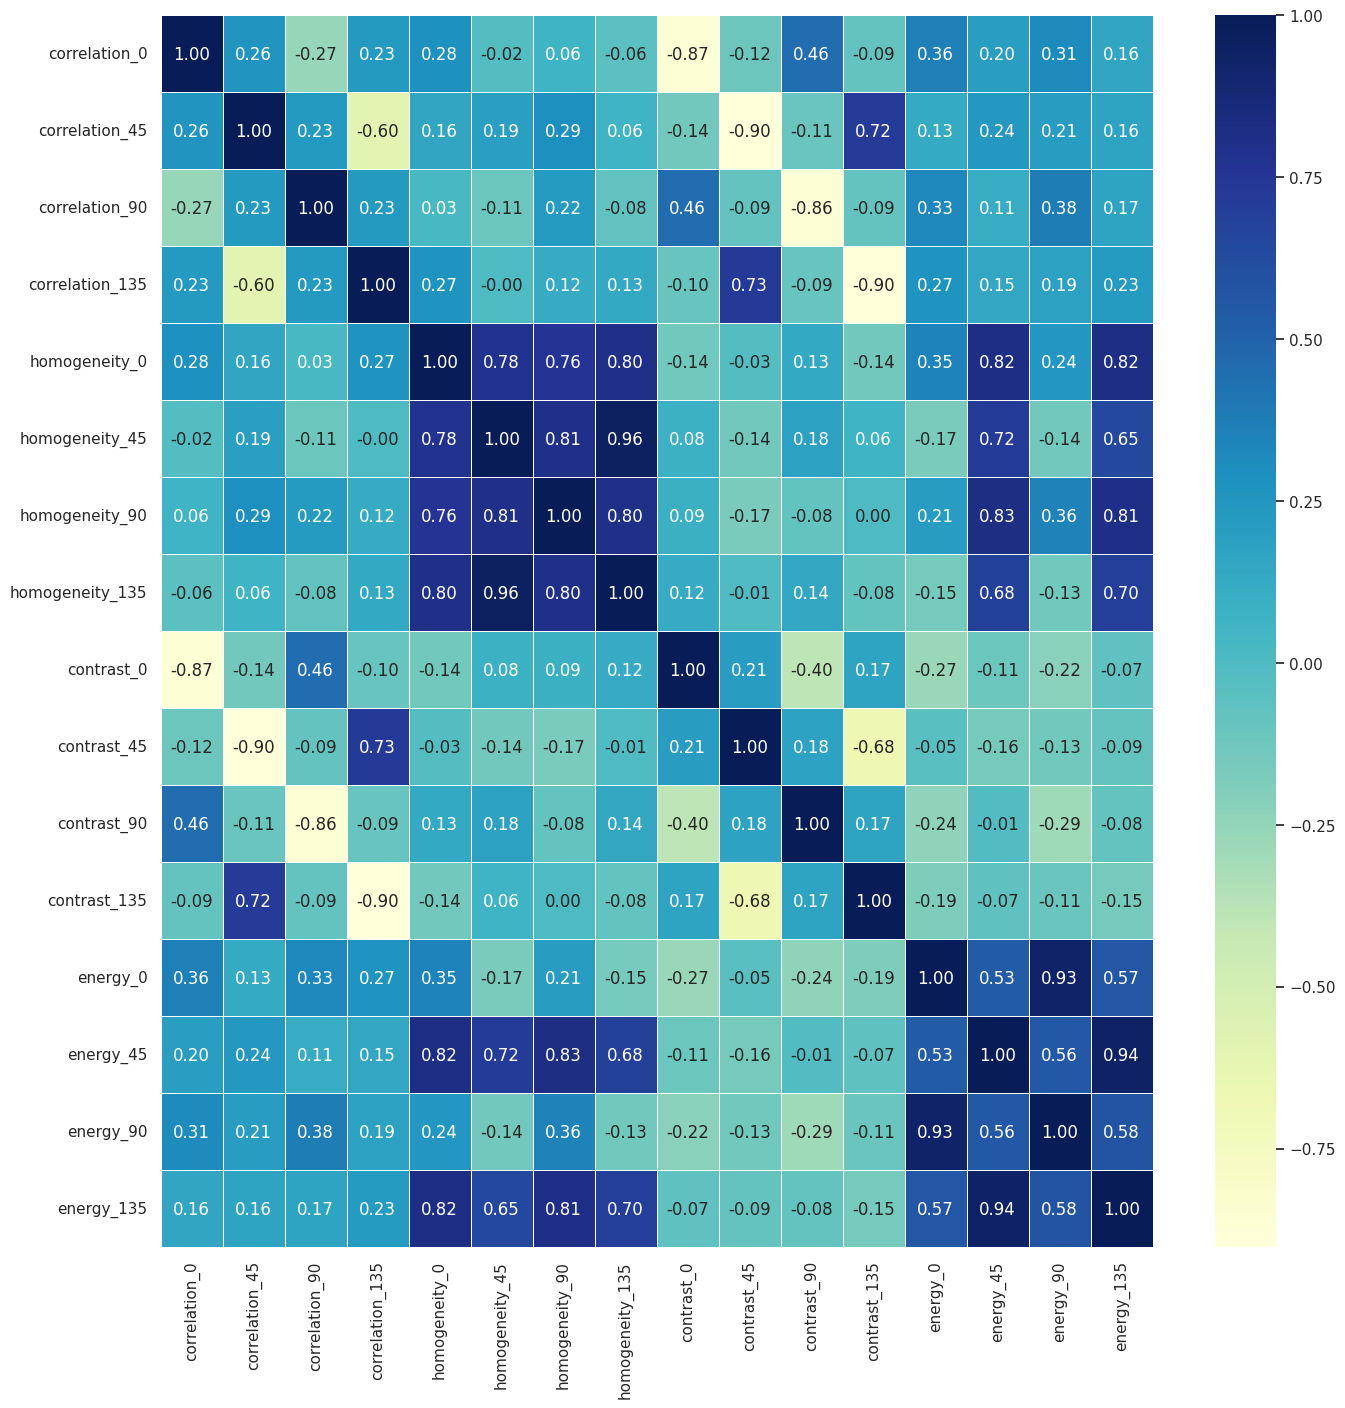

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

f,axis = plt.subplots(figsize=(16,16))
sns.heatmap(glcm_df.corr(),cmap='YlGnBu', annot=True, linewidths=.4, fmt= '.2f',ax=axis)
plt.show()

In [ ]:
glcm_df.to_csv(r'Beras.csv', index=False)

## ***Create and Read CSV File For Classification***

In [ ]:
from pandas.core.describe import DataFrameDescriber
DataFrameDescriber =  pd.read_csv('/content/Beras.csv')

In [ ]:
glcm_df =  pd.read_csv('/content/Beras.csv')

In [ ]:
result = []
for value in range(0,2500):
  if value <= 499:
    result.append("IR42")
  elif value <= 999:
    result.append("IR64")
  elif value <= 1499:
    result.append("PandanWangi")
  elif value <= 1999:
    result.append("PeraPadang")
  else:
    result.append("Rojolele")

glcm_df['label'] = result

In [ ]:
data = glcm_df[['correlation_0', 'homogeneity_0', 'contrast_0', 'energy_0',
                'correlation_45', 'homogeneity_45', 'contrast_45', 'energy_45',
                'correlation_90', 'homogeneity_90', 'contrast_90', 'energy_90',
                'correlation_135', 'homogeneity_135', 'contrast_135', 'energy_135']].to_numpy()

In [ ]:
print(data)

[[  0.94939167   0.84634658 214.25879195 ...   0.84345461 229.96617269
    0.46676761]
 [  0.94346664   0.84686104 271.78389262 ...   0.84294823 253.67523985
    0.46988775]
 [  0.93540005   0.84679171 266.73615213 ...   0.84747309 210.70271609
    0.47548188]
 ...
 [  0.95568322   0.84579251 221.26662192 ...   0.79003405 207.72244493
    0.45188203]
 [  0.96571926   0.84475079 173.51991051 ...   0.78379674 386.46232152
    0.44770672]
 [  0.97100776   0.8418582  157.70666667 ...   0.77896645 357.78595559
    0.44657691]]


In [ ]:
label = glcm_df['label'].to_numpy()

In [ ]:
(glcm_df['label'].value_counts())

IR42           500
IR64           500
PandanWangi    500
PeraPadang     500
Rojolele       500
Name: label, dtype: int64

In [ ]:
(glcm_df['label'].unique())

array(['IR42', 'IR64', 'PandanWangi', 'PeraPadang', 'Rojolele'],
      dtype=object)

In [ ]:
glcm_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   correlation_0    2500 non-null   float64
 1   correlation_45   2500 non-null   float64
 2   correlation_90   2500 non-null   float64
 3   correlation_135  2500 non-null   float64
 4   homogeneity_0    2500 non-null   float64
 5   homogeneity_45   2500 non-null   float64
 6   homogeneity_90   2500 non-null   float64
 7   homogeneity_135  2500 non-null   float64
 8   contrast_0       2500 non-null   float64
 9   contrast_45      2500 non-null   float64
 10  contrast_90      2500 non-null   float64
 11  contrast_135     2500 non-null   float64
 12  energy_0         2500 non-null   float64
 13  energy_45        2500 non-null   float64
 14  energy_90        2500 non-null   float64
 15  energy_135       2500 non-null   float64
 16  label            2500 non-null   object 
dtypes: float64(16)

In [ ]:
print(glcm_df)

# ***Preparation K-Nearest Neighbours (KNN) Classification***

## ***Import Library***

In [ ]:
# Membuat Model - Import Library
from sklearn.model_selection import cross_val_score, KFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix

## ***Splitting Dataset***

In [ ]:
# Membagi dataset ke data latih dan data uji
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data,label,test_size=0.2, random_state=42)

In [ ]:
#jumlah training data
X_train.shape, y_train.shape

((2000, 16), (2000,))

In [ ]:
#jumlah testing data
X_test.shape, y_test.shape

((500, 16), (500,))

## ***Modelling K-Nearest Neighbors Classification***

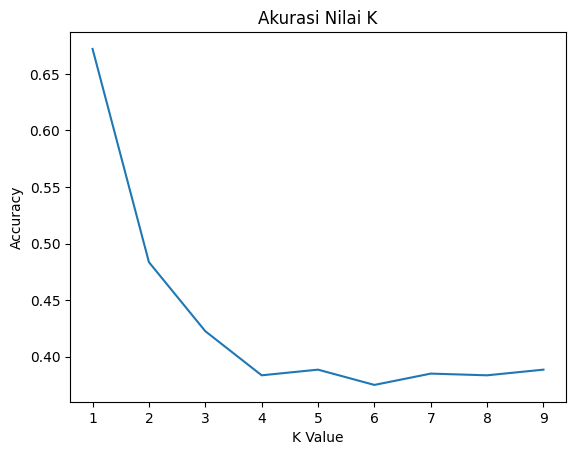

Nilai K terbaik adalah 1
Akurasi sebesar 67 %
Training Time: 0.0762 seconds


In [ ]:
import matplotlib.pyplot as plt
import time

# Define the range of K values
k_values = range(1,10)

# Initialize lists to store accuracies and mean accuracies
accuracies = []
mean_accuracies = []

# Perform K-Fold Cross Validation for each K value
for k in k_values:
    start_time = time.time()  # Get start time
    knn = KNeighborsClassifier(n_neighbors=k)
    cv = KFold(n_splits=2, shuffle=True, random_state=42)  # K-Fold with 2 splits
    scores = []

    # Perform cross-validation for each fold
    for train_index, test_index in cv.split(X_train, y_train):
        X_train_fold, X_test_fold = X_train[train_index], X_train[test_index]
        y_train_fold, y_test_fold = y_train[train_index], y_train[test_index]

        # Melatih model
        knn.fit(X_train_fold, y_train_fold)
        fold_score = knn.score(X_test_fold, y_test_fold)
        scores.append(fold_score)
        training_time = time.time() - start_time  # Calculate training time

    mean_accuracy = np.mean(scores)
    accuracies.append(scores)
    mean_accuracies.append(mean_accuracy)

# Plot the accuracies for each K value
plt.plot(k_values, mean_accuracies)
plt.title('Akurasi Nilai K')
plt.xlabel('K Value')
plt.ylabel('Accuracy')
plt.show()

# Find the best K value based on mean accuracy
best_k = k_values[np.argmax(mean_accuracies)]
print("Nilai K terbaik adalah", best_k)
print("Akurasi sebesar", round(max(mean_accuracies)*100), "%")
print(f"Training Time: {training_time:.4f} seconds")

## ***Evaluation K-Nearest Neighbors Classification***

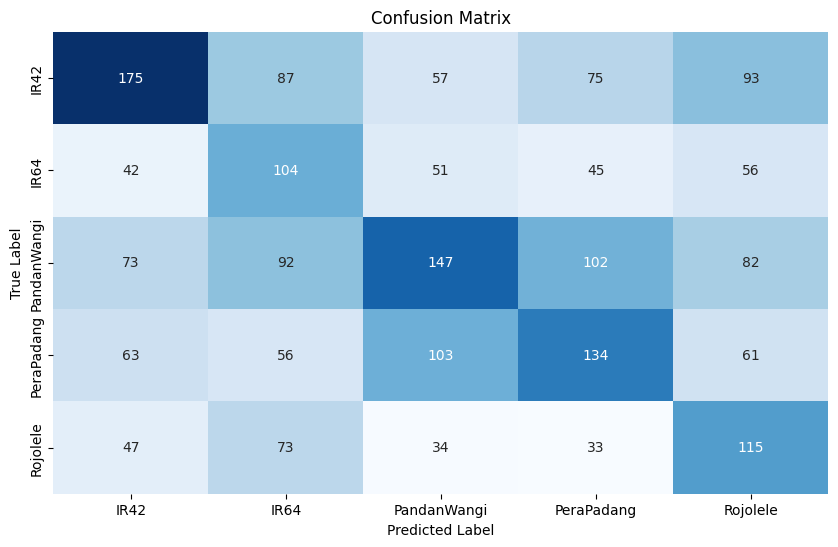

In [ ]:
#visualisasi confusion matrix
import seaborn as sns
pred = knn.predict(X_train)
cm = confusion_matrix(pred, y_train)
plt.figure(figsize=(10, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=['IR42', 'IR64', 'PandanWangi', 'PeraPadang', 'Rojolele'],
            yticklabels=['IR42', 'IR64', 'PandanWangi', 'PeraPadang', 'Rojolele'])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

In [ ]:
#prediksi data train menggunakan model KNN
pred = knn.predict(X_train)
print("Accuracy on the test set:", round(accuracy_score(y_train, pred), 3))

Accuracy on the test set: 0.458


In [ ]:
# laporan klasifikasi data train
from sklearn.metrics import classification_report
target_names = ['IR42', 'IR64', 'PandanWangi', 'PeraPadang', 'Rojolele']
print(classification_report(y_train, pred, target_names=target_names))

              precision    recall  f1-score   support

        IR42       0.48      0.54      0.51       400
        IR64       0.41      0.38      0.39       412
 PandanWangi       0.42      0.42      0.42       392
  PeraPadang       0.48      0.48      0.48       389
    Rojolele       0.50      0.48      0.49       407

    accuracy                           0.46      2000
   macro avg       0.46      0.46      0.46      2000
weighted avg       0.46      0.46      0.46      2000



In [ ]:
# menghitung confusinon matrix data train
confusion_mat = confusion_matrix(pred, y_train)
print(confusion_mat)

[[175  87  57  75  93]
 [ 42 104  51  45  56]
 [ 73  92 147 102  82]
 [ 63  56 103 134  61]
 [ 47  73  34  33 115]]


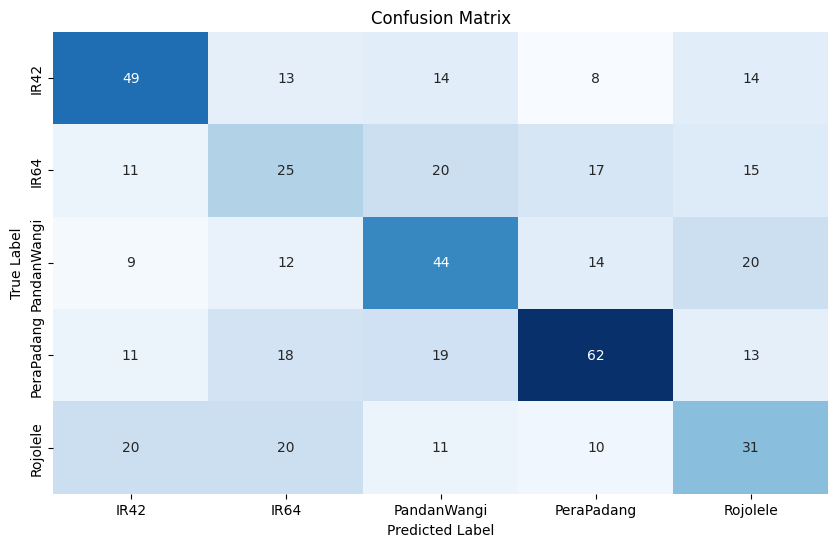

In [ ]:
#visualisasi confusion matrix
import seaborn as sns
pred = knn.predict(X_test)
cm = confusion_matrix(pred, y_test)
plt.figure(figsize=(10, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=['IR42', 'IR64', 'PandanWangi', 'PeraPadang', 'Rojolele'],
            yticklabels=['IR42', 'IR64', 'PandanWangi', 'PeraPadang', 'Rojolele'])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

In [ ]:
# prediksi data test menggunakan model KNN

start_time = time.time()  # Get start time
pred = knn.predict(X_test)
inference_time = time.time() - start_time  # Calculate inference time
print("Accuracy on the test set:", round(accuracy_score(y_test, pred), 3))
print(f"Inference Time: {inference_time:.4f} seconds")

Accuracy on the test set: 0.422
Inference Time: 0.0320 seconds


In [ ]:
# laporan klasifikasi data test
from sklearn.metrics import classification_report
target_names = ['IR42', 'IR64', 'PandanWangi', 'PeraPadang', 'Rojolele']
print(classification_report(y_test, pred, target_names=target_names))

              precision    recall  f1-score   support

        IR42       0.50      0.49      0.49       100
        IR64       0.28      0.28      0.28        88
 PandanWangi       0.44      0.41      0.43       108
  PeraPadang       0.50      0.56      0.53       111
    Rojolele       0.34      0.33      0.34        93

    accuracy                           0.42       500
   macro avg       0.41      0.41      0.41       500
weighted avg       0.42      0.42      0.42       500



In [ ]:
# menghitung confusinon matrix data test
confusion_mat = confusion_matrix(pred, y_test)
print(confusion_mat)

[[49 13 14  8 14]
 [11 25 20 17 15]
 [ 9 12 44 14 20]
 [11 18 19 62 13]
 [20 20 11 10 31]]
